In [3]:
'''📊 EDA on California Hospital Discharge Records

In this project, I will explore a dataset containing hospital discharge summaries from different hospitals in California. The data includes information like hospital name, location (county and ZIP), type of care given, diagnosis category, payer type (insurance), number of discharges, and the total charges.

The main aim of this project is to:
- Understand which diagnosis categories are most common
- See how different types of insurance or payers affect hospital charges
- Analyze the length of hospital stays by care type
- Compare discharges and charges across different hospitals and counties

This is a real-world dataset and performing EDA on it will help me understand how hospitals operate and how patient care and charges vary across regions. The insights from this project can be useful in healthcare planning and policy decisions.'''


'📊 EDA on California Hospital Discharge Records\n\nIn this project, I will explore a dataset containing hospital discharge summaries from different hospitals in California. The data includes information like hospital name, location (county and ZIP), type of care given, diagnosis category, payer type (insurance), number of discharges, and the total charges.\n\nThe main aim of this project is to:\n- Understand which diagnosis categories are most common\n- See how different types of insurance or payers affect hospital charges\n- Analyze the length of hospital stays by care type\n- Compare discharges and charges across different hospitals and counties\n\nThis is a real-world dataset and performing EDA on it will help me understand how hospitals operate and how patient care and charges vary across regions. The insights from this project can be useful in healthcare planning and policy decisions.'

In [7]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df=pd.read_csv(r"C:\Users\Ashwini\Downloads\major-diagnostic-categories-summary.csv")
df.head()

,Discharge_Yr,OSHPD_ID,FACILITY_NAME,Hospital_County,Hospital_Zip,TypeCare,Adjusted_Length_of_Stay,MDC,Payer,Discharges,Valid_Charges
0,2011,10735,ALAMEDA HOSPITAL,Alameda,94501,Acute Care,1,ALCOHOL-DRUG USE AND ALCOHOL-DRUG INDUCED ORGA...,Managed Care - KNOX-KEENE/Medi-Cal County Orga...,2,26216
1,2011,10735,ALAMEDA HOSPITAL,Alameda,94501,Acute Care,1,ALCOHOL-DRUG USE AND ALCOHOL-DRUG INDUCED ORGA...,Managed Care - Other,4,65415
2,2011,10735,ALAMEDA HOSPITAL,Alameda,94501,Acute Care,1,ALCOHOL-DRUG USE AND ALCOHOL-DRUG INDUCED ORGA...,Not Applicable,3,48939
3,2011,10735,ALAMEDA HOSPITAL,Alameda,94501,Acute Care,1,ALCOHOL-DRUG USE AND ALCOHOL-DRUG INDUCED ORGA...,Traditional Coverage,2,30886
4,2011,10735,ALAMEDA HOSPITAL,Alameda,94501,Acute Care,1,"BLOOD, BLOOD FORMING ORGANS,IMMUNOLOGICAL, DIS...",Managed Care - KNOX-KEENE/Medi-Cal County Orga...,2,30406


In [16]:
df.shape #finding out rows and columns

(1048576, 11)

In [20]:
df.describe

<bound method NDFrame.describe of          Discharge_Yr  OSHPD_ID                   FACILITY_NAME  \
0                2011     10735                ALAMEDA HOSPITAL   
1                2011     10735                ALAMEDA HOSPITAL   
2                2011     10735                ALAMEDA HOSPITAL   
3                2011     10735                ALAMEDA HOSPITAL   
4                2011     10735                ALAMEDA HOSPITAL   
...               ...       ...                             ...   
1048571          2014    191227  LAC/HARBOR-UCLA MEDICAL CENTER   
1048572          2014    191227  LAC/HARBOR-UCLA MEDICAL CENTER   
1048573          2014    191227  LAC/HARBOR-UCLA MEDICAL CENTER   
1048574          2014    191227  LAC/HARBOR-UCLA MEDICAL CENTER   
1048575          2014    191227  LAC/HARBOR-UCLA MEDICAL CENTER   

        Hospital_County  Hospital_Zip    TypeCare  Adjusted_Length_of_Stay  \
0               Alameda         94501  Acute Care                        1   
1    

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 11 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   Discharge_Yr             1048576 non-null  int64 
 1   OSHPD_ID                 1048576 non-null  int64 
 2   FACILITY_NAME            1048576 non-null  object
 3   Hospital_County          1048576 non-null  object
 4   Hospital_Zip             1048576 non-null  int64 
 5   TypeCare                 1048576 non-null  object
 6   Adjusted_Length_of_Stay  1048576 non-null  int64 
 7   MDC                      1048576 non-null  object
 8   Payer                    1048576 non-null  object
 9   Discharges               1048576 non-null  int64 
 10  Valid_Charges            1048576 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 88.0+ MB


In [24]:
df.isnull().sum() #checking null values

Discharge_Yr               0
OSHPD_ID                   0
FACILITY_NAME              0
Hospital_County            0
Hospital_Zip               0
TypeCare                   0
Adjusted_Length_of_Stay    0
MDC                        0
Payer                      0
Discharges                 0
Valid_Charges              0
dtype: int64

In [26]:
df.dtypesv#checking data types

Discharge_Yr                int64
OSHPD_ID                    int64
FACILITY_NAME              object
Hospital_County            object
Hospital_Zip                int64
TypeCare                   object
Adjusted_Length_of_Stay     int64
MDC                        object
Payer                      object
Discharges                  int64
Valid_Charges               int64
dtype: object

In [90]:
df['MDC'].value_counts()

MDC
RESPIRATORY SYSTEM, DISEASES & DISORDERS                             83298
INFECTIOUS & PARASITIC DISEASES                                      81101
DIGESTIVE SYSTEM, DISEASES & DISORDERS                               72569
CIRCULATORY SYSTEM, DISEASES & DISORDERS                             71515
NERVOUS SYSTEM, DISEASES & DISORDERS                                 69130
MUSCULOSKELETAL SYSTEM & CONNECTIVE TISSUE, DISEASES & DISORDERS     60184
MENTAL DISEASES & DISORDERS                                          57518
NEWBORNS AND NEONATE CONDITIONS BEGAN IN PERINATAL PERIOD            54139
FACTORS ON HEALTH STATUS & OTHER CONTACTS WITH HEALTH SERVICES       54130
HEPATOBILIARY SYSTEM & PANCREAS, DISEASES & DISORDERS                52586
KIDNEY AND URINARY TRACT, DISEASES & DISORDERS                       49401
SKIN, SUBCUTANEOUS TISSUE & BREAST, DISEASES & DISORDERS             43923
ENDOCRINE, NUTRITIONAL, AND METABOLIC, DISEASES & DISORDERS          41370
INJURIES, POISONINGS,

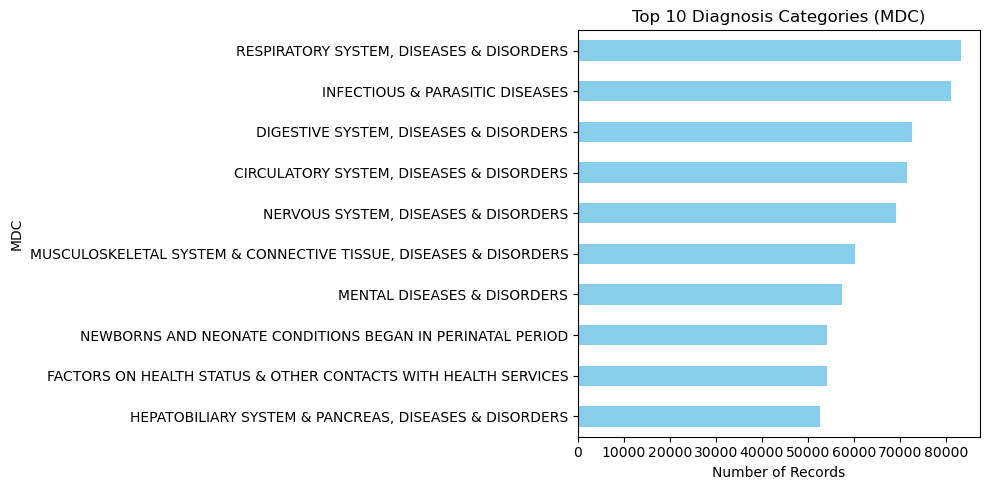

In [88]:
# Top 10 Diagnosis Categories (MDC)
top_mdc = df['MDC'].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_mdc.plot(kind='barh', color='skyblue')
plt.title("Top 10 Diagnosis Categories (MDC)")
plt.xlabel("Number of Records")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

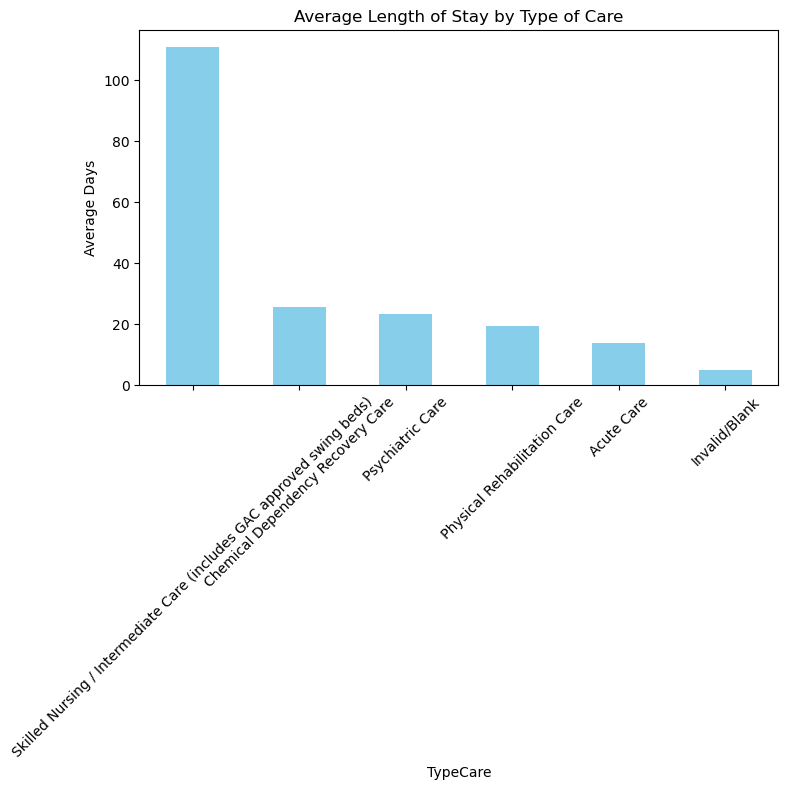

In [68]:
#  Average Length of Stay by Type of Care
avg_stay_by_care = df.groupby('TypeCare')['Adjusted_Length_of_Stay'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 8))
avg_stay_by_care.plot(kind='bar', color='skyblue')
plt.title("Average Length of Stay by Type of Care")
plt.ylabel("Average Days")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

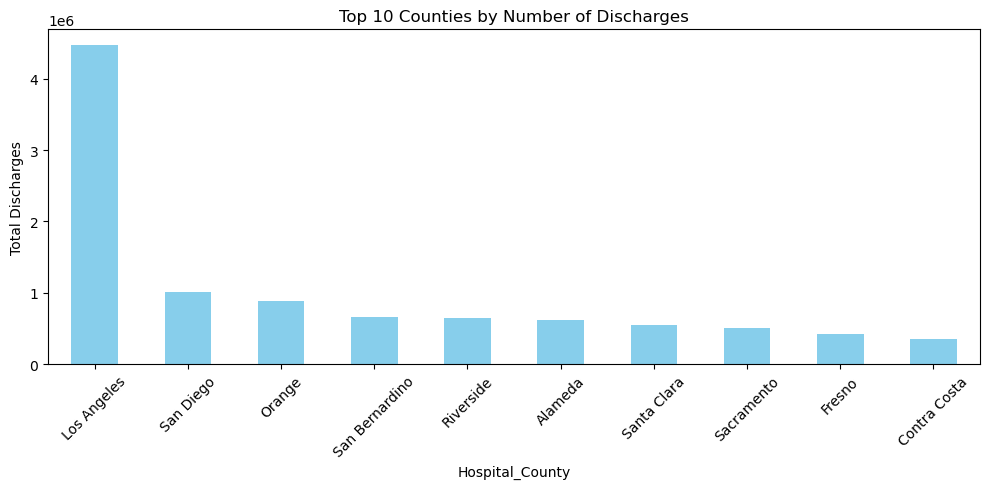

In [76]:
#  Top 10 Counties by Total Discharges
discharges_by_county = df.groupby('Hospital_County')['Discharges'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
discharges_by_county.plot(kind='bar', color='skyblue')
plt.title("Top 10 Counties by Number of Discharges")
plt.ylabel("Total Discharges")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
# What is the distribution of hospital charges (Valid_Charges)?

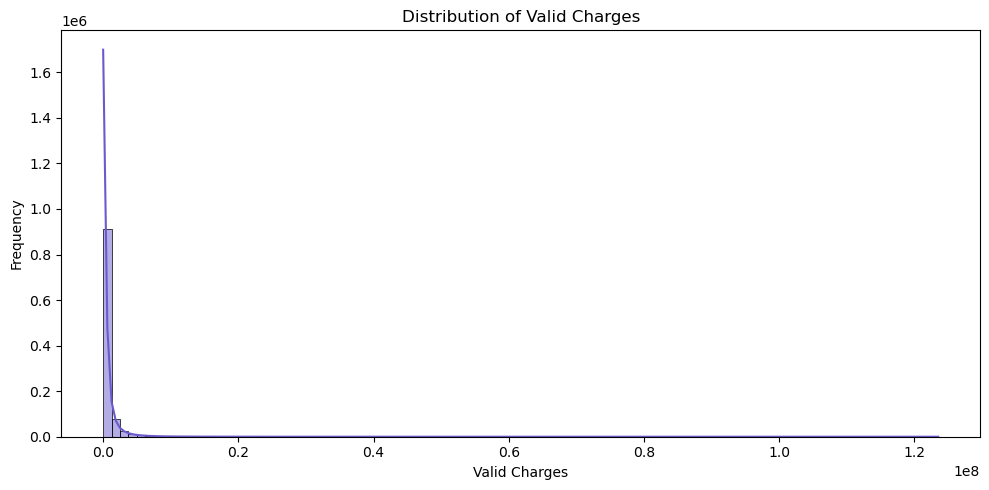

In [66]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Valid_Charges'], bins=100, kde=True, color='slateblue')
plt.title("Distribution of Valid Charges")
plt.xlabel("Valid Charges")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:
#How do hospital charges vary by payer type?

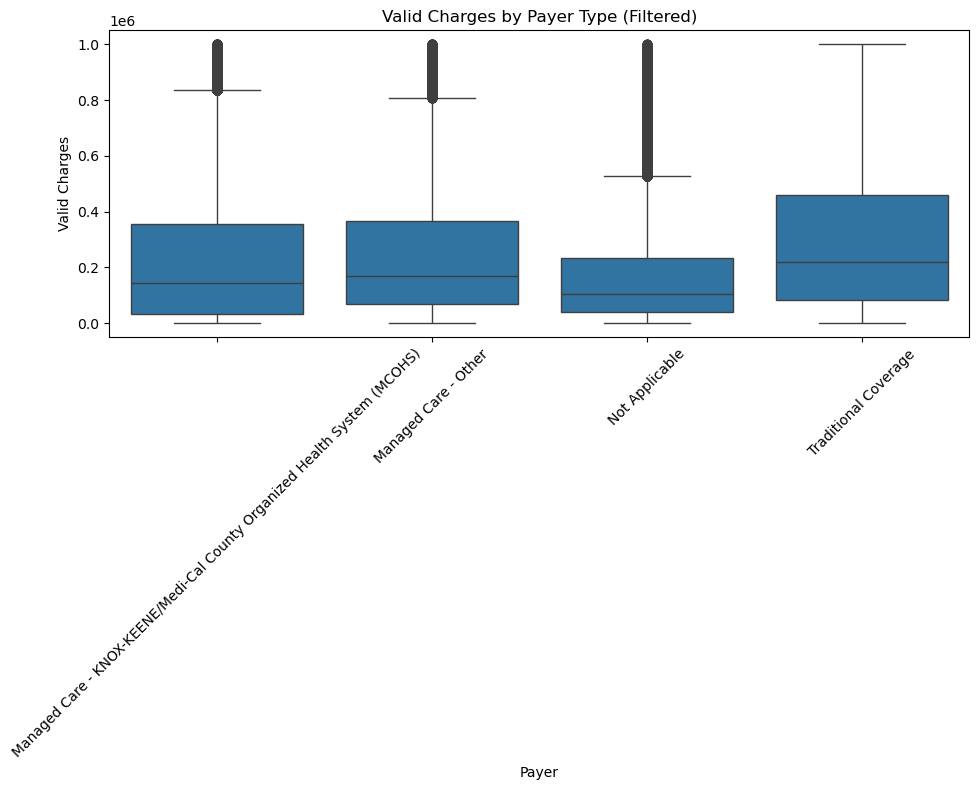

In [70]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[df['Valid_Charges'] < 1_000_000], x='Payer', y='Valid_Charges')
plt.title("Valid Charges by Payer Type (Filtered)")
plt.ylabel("Valid Charges")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [58]:
# Is there a relationship between number of discharges and hospital charges?

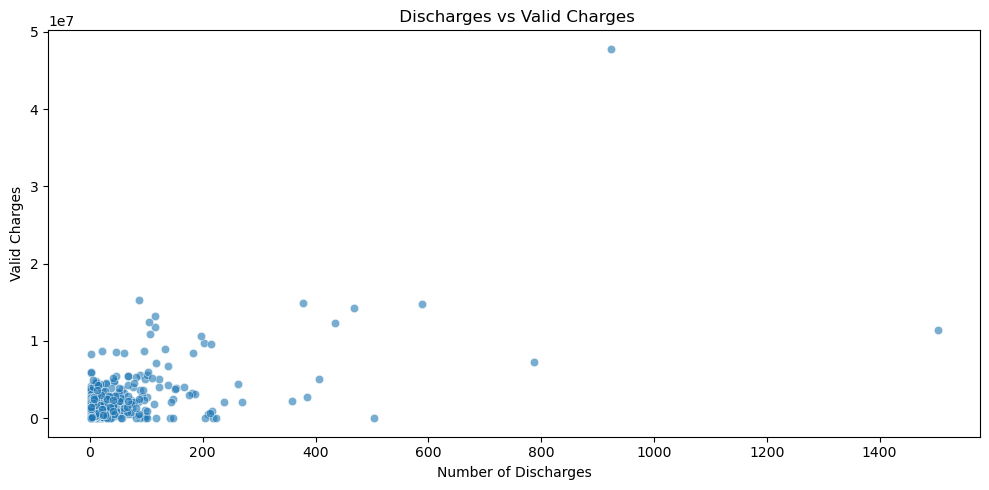

In [62]:
plt.figure(figsize=(10, 5))
sample_df = df[['Discharges', 'Valid_Charges']].sample(2000)
sns.scatterplot(data=sample_df, x='Discharges', y='Valid_Charges', alpha=0.6)
plt.title(" Discharges vs Valid Charges")
plt.xlabel("Number of Discharges")
plt.ylabel("Valid Charges")
plt.tight_layout()
plt.show()


In [82]:
#How do charges differ between types of care (Acute, Rehab, etc.)?

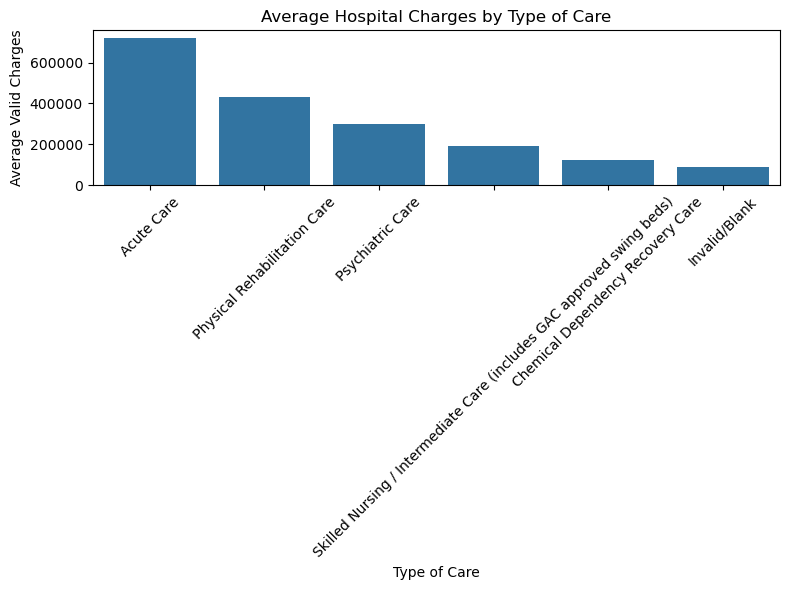

In [80]:
care_charges = df.groupby('TypeCare')['Valid_Charges'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=care_charges, x='TypeCare', y='Valid_Charges')
plt.title("Average Hospital Charges by Type of Care")
plt.xlabel("Type of Care")
plt.ylabel("Average Valid Charges")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


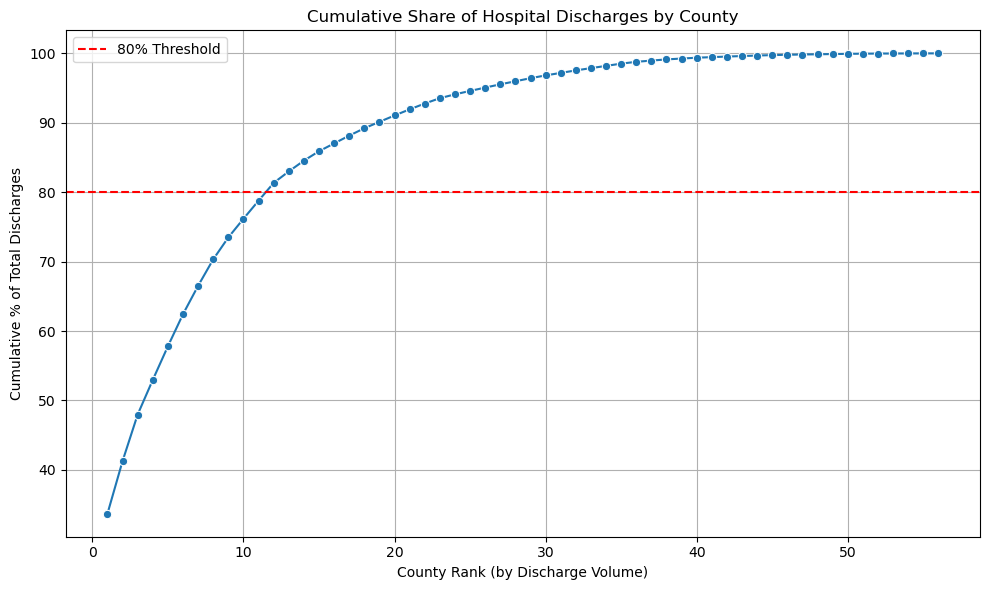

In [84]:
# Step 1: Group by Hospital_County and sum discharges
county_discharge = df.groupby('Hospital_County')['Discharges'].sum().sort_values(ascending=False).reset_index()

# Step 2: Calculate cumulative discharge and percentage
county_discharge['Cumulative_Discharge'] = county_discharge['Discharges'].cumsum()
total_discharge = county_discharge['Discharges'].sum()
county_discharge['Cumulative_Percent'] = 100 * county_discharge['Cumulative_Discharge'] / total_discharge

# Step 3: Plot cumulative distribution
plt.figure(figsize=(10, 6))
sns.lineplot(data=county_discharge, x=range(1, len(county_discharge)+1), y='Cumulative_Percent', marker="o")
plt.axhline(80, color='red', linestyle='--', label='80% Threshold')
plt.title("Cumulative Share of Hospital Discharges by County")
plt.xlabel("County Rank (by Discharge Volume)")
plt.ylabel("Cumulative % of Total Discharges")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [1]:
import os
os.getcwd()



'C:\\Users\\Ashwini'